In [1]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("C:/Users/Admin/Downloads/pima-indians-diabetes-3.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
demo.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
knn=KNeighborsClassifier(n_neighbors=4)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
# scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(knn.score(scaledX_train,y_train))
predicted = knn.predict(scaledX_test)
print(confusion_matrix(y_test,predicted))

What is the Testing Accuracy
0.7337662337662337
What is the Training Accuracy
0.8061889250814332
[[91  8]
 [33 22]]


In [4]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

neighbors = np.arange(1, 60)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
neighbors = np.arange(1, 60)
fn_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    fn=[]
    for j in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        fn.append(confusion_matrix(y_test,predicted)[1,0])
    #Compute accuracy on the training set
    fn_plot[i] = np.mean(fn)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, fn_plot, label = 'False Negatives')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('False Negatives')
plt.show()

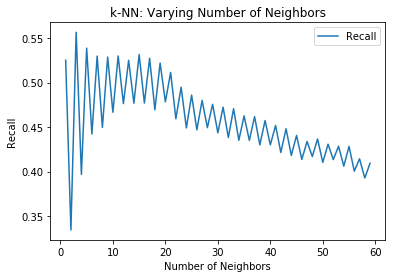

In [8]:
from matplotlib import pyplot as plt
from sklearn.metrics import recall_score
import numpy as np
neighbors = np.arange(1, 60)
recall_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    recall=[]
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        recall.append(recall_score(y_test,predicted))
    #Compute accuracy on the training set
    recall_plot[i] = np.mean(recall)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, recall_plot, label = 'Recall')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Recall')
plt.show()

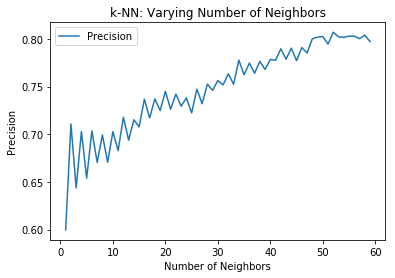

In [9]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score
import numpy as np
neighbors = np.arange(1, 60)
precision_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    precision=[]
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        precision.append(precision_score(y_test,predicted))
    #Compute accuracy on the training set
    precision_plot[i] = np.mean(precision)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, precision_plot, label = 'Precision')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Precision')
plt.show()

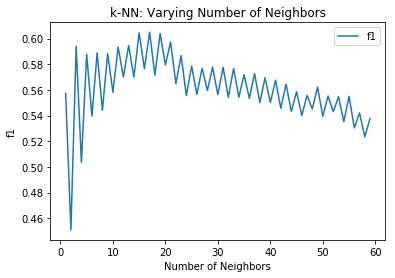

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
import numpy as np
neighbors = np.arange(1, 60)
f1_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    f1=[]
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        f1.append(f1_score(y_test,predicted))
    #Compute accuracy on the training set
    f1_plot[i] = np.mean(f1)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, f1_plot, label = 'f1')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('f1')
plt.show()

In [11]:
#First Split the Data

In [12]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
demo.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
k_neighbors = []
# perform 10-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 31


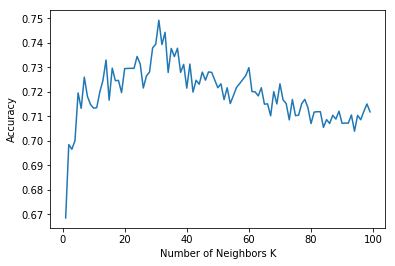

In [14]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(k_neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

In [15]:
#Build Final Model
from sklearn.metrics import confusion_matrix
final = KNeighborsClassifier(n_neighbors=31)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)

array([[90,  9],
       [26, 29]], dtype=int64)

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
max_depth = []
for k in myList:
    dt = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of max_depth is %d" % best_k)

The optimal number of max_depth is 4


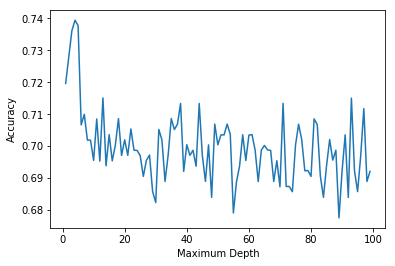

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(max_depth, cv_scores)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()

In [18]:
#Build Final Model
from sklearn.metrics import confusion_matrix
final = DecisionTreeClassifier(max_depth=4)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)

array([[85, 14],
       [20, 35]], dtype=int64)

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
n_estimators = []
for k in myList:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    n_estimators.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of n_estimators is %d" % best_k)

The optimal number of n_estimators is 53


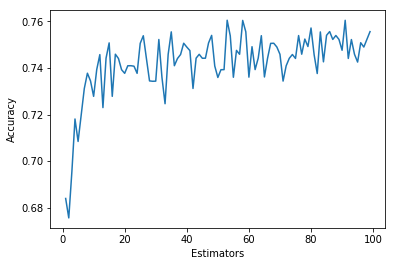

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(max_depth, cv_scores)
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()

In [21]:
#Build Final Model
from sklearn.metrics import confusion_matrix
final = RandomForestClassifier(n_estimators=43)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)

array([[88, 11],
       [20, 35]], dtype=int64)

In [22]:
scoresrf = cross_val_score(final, X_train, y_train, cv=20, scoring='accuracy')

In [23]:
print("Bias Error")
print(1-np.mean(scoresrf))
print("Variance Error")
print(np.var(scoresrf,ddof=1))

Bias Error
0.2445396505376345
Variance Error
0.006949001213157439


In [24]:
#Build Final Model
from sklearn.metrics import confusion_matrix
final = DecisionTreeClassifier()
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)

array([[75, 24],
       [26, 29]], dtype=int64)

In [25]:
scoresdt = cross_val_score(final, X_train, y_train, cv=20, scoring='accuracy')

In [26]:
print("Bias Error")
print(1-np.mean(scoresdt))
print("Variance Error")
print(np.var(scoresdt,ddof=1))

Bias Error
0.31625672043010744
Variance Error
0.0072476805102962925


In [27]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
neighbors = np.arange(1,100)
# create and fit a ridge regression model, testing each alpha
model = KNeighborsClassifier()
grid = GridSearchCV(cv=20,estimator=model, param_grid=dict(n_neighbors=neighbors))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.749185667752443
31


In [28]:
#Build Final Model
from sklearn.metrics import confusion_matrix
final = KNeighborsClassifier(n_neighbors=31)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)

array([[90,  9],
       [26, 29]], dtype=int64)

In [29]:
from sklearn.ensemble import BaggingClassifier
knn = KNeighborsClassifier(n_neighbors=1)
bg = BaggingClassifier(base_estimator=knn,n_estimators=50)
bg.fit(X_train,y_train)
predicted = bg.predict(X_test)
confusion_matrix(y_test,predicted)

array([[75, 24],
       [19, 36]], dtype=int64)

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
k_neighbors = []
# perform 10-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='roc_auc')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 60
